In [26]:
import  pandas as pd

In [27]:
df = pd.read_csv('./signalStatus.csv')

In [28]:
df.head()

,Signal,Red,Yellow,Green,Vehicles_Crossed
0,Signal 1 RED,100,5,20,7
1,Signal 2 GREEN,0,5,20,0
2,Signal 3 RED,25,5,20,0
3,Signal 4 RED,75,5,20,0
4,NaN,Red,Yellow,Green,Vehicles Crossed


In [29]:
i = df[(( df.Red == 'Red') & (df.Yellow == 'Yellow') & (df.Green == 'Green') & (df.Vehicles_Crossed == 'Vehicles Crossed'))].index
df.drop(i, inplace=True)
df.head()

,Signal,Red,Yellow,Green,Vehicles_Crossed
0,Signal 1 RED,100,5,20,7
1,Signal 2 GREEN,0,5,20,0
2,Signal 3 RED,25,5,20,0
3,Signal 4 RED,75,5,20,0
5,Signal 1 RED,99,5,20,7


In [30]:
df['Signal_Number'] = df['Signal'].str.extract(r'(Signal \d+)')
df['State'] = df['Signal'].str.extract(r'(RED|GREEN|YELLOW)')

In [31]:
df

,Signal,Red,Yellow,Green,Vehicles_Crossed,Signal_Number,State
0,Signal 1 RED,100,5,20,7,Signal 1,RED
1,Signal 2 GREEN,0,5,20,0,Signal 2,GREEN
2,Signal 3 RED,25,5,20,0,Signal 3,RED
3,Signal 4 RED,75,5,20,0,Signal 4,RED
5,Signal 1 RED,99,5,20,7,Signal 1,RED
...,...,...,...,...,...,...,...
14293,Signal 4 GREEN,0,5,2,473,Signal 4,GREEN
14295,Signal 1 RED,6,5,20,1638,Signal 1,RED
14296,Signal 2 RED,56,5,20,1751,Signal 2,RED
14297,Signal 3 RED,81,5,20,493,Signal 3,RED


In [32]:
signals = df['Signal_Number'].unique()
pivoted_dfs = []

for signal in signals:
    signal_df = df[df['Signal_Number'] == signal]
    signal_df = signal_df.drop(columns=['Signal', 'Signal_Number'])
    signal_df = signal_df.rename(columns=lambda x: f"{x}_{signal}")
    pivoted_dfs.append(signal_df.reset_index(drop=True))

# Concatenate the DataFrames side by side
pivoted_df = pd.concat(pivoted_dfs, axis=1)

In [33]:
pivoted_df.head(30)

,Red_Signal 1,Yellow_Signal 1,Green_Signal 1,Vehicles_Crossed_Signal 1,State_Signal 1,Red_Signal 2,Yellow_Signal 2,Green_Signal 2,Vehicles_Crossed_Signal 2,State_Signal 2,Red_Signal 3,Yellow_Signal 3,Green_Signal 3,Vehicles_Crossed_Signal 3,State_Signal 3,Red_Signal 4,Yellow_Signal 4,Green_Signal 4,Vehicles_Crossed_Signal 4,State_Signal 4
0,100,5,20,7,RED,0,5,20,0,GREEN,25,5,20,0,RED,75,5,20,0,RED
1,99,5,20,7,RED,0,5,19,9,GREEN,24,5,20,0,RED,74,5,20,0,RED
2,98,5,20,7,RED,0,5,18,11,GREEN,23,5,20,0,RED,73,5,20,0,RED
3,97,5,20,7,RED,0,5,17,13,GREEN,22,5,20,0,RED,72,5,20,0,RED
4,96,5,20,7,RED,0,5,16,14,GREEN,21,5,20,0,RED,71,5,20,0,RED
5,95,5,20,7,RED,0,5,15,15,GREEN,20,5,20,0,RED,70,5,20,0,RED
6,94,5,20,7,RED,0,5,14,15,GREEN,19,5,20,0,RED,69,5,20,0,RED
7,93,5,20,7,RED,0,5,13,16,GREEN,18,5,20,0,RED,68,5,20,0,RED
8,92,5,20,7,RED,0,5,12,17,GREEN,17,5,20,0,RED,67,5,20,0,RED
9,91,5,20,7,RED,0,5,11,17,GREEN,16,5,20,0,RED,66,5,20,0,RED


In [34]:
pivoted_df = pivoted_df.loc[:, ~pivoted_df.columns.str.contains('Yellow')]

pivoted_df.head(30)

,Red_Signal 1,Green_Signal 1,Vehicles_Crossed_Signal 1,State_Signal 1,Red_Signal 2,Green_Signal 2,Vehicles_Crossed_Signal 2,State_Signal 2,Red_Signal 3,Green_Signal 3,Vehicles_Crossed_Signal 3,State_Signal 3,Red_Signal 4,Green_Signal 4,Vehicles_Crossed_Signal 4,State_Signal 4
0,100,20,7,RED,0,20,0,GREEN,25,20,0,RED,75,20,0,RED
1,99,20,7,RED,0,19,9,GREEN,24,20,0,RED,74,20,0,RED
2,98,20,7,RED,0,18,11,GREEN,23,20,0,RED,73,20,0,RED
3,97,20,7,RED,0,17,13,GREEN,22,20,0,RED,72,20,0,RED
4,96,20,7,RED,0,16,14,GREEN,21,20,0,RED,71,20,0,RED
5,95,20,7,RED,0,15,15,GREEN,20,20,0,RED,70,20,0,RED
6,94,20,7,RED,0,14,15,GREEN,19,20,0,RED,69,20,0,RED
7,93,20,7,RED,0,13,16,GREEN,18,20,0,RED,68,20,0,RED
8,92,20,7,RED,0,12,17,GREEN,17,20,0,RED,67,20,0,RED
9,91,20,7,RED,0,11,17,GREEN,16,20,0,RED,66,20,0,RED


In [35]:
def reorder_columns(df):
    columns = df.columns.tolist()
    reordered_columns = []

    # Extract unique signal identifiers
    signals = sorted(set(col.split('_')[-1] for col in columns if 'Signal' in col))

    # Desired order for each signal
    order = ['State', 'Red', 'Green', 'Vehicles_Crossed']

    # Reorder columns for each signal
    for signal in signals:
        for col_prefix in order:
            reordered_columns.append(f'{col_prefix}_{signal}')

    return df[reordered_columns]

# Reorder columns
pivoted_df = reorder_columns(pivoted_df)

pivoted_df.head(30)

,State_Signal 1,Red_Signal 1,Green_Signal 1,Vehicles_Crossed_Signal 1,State_Signal 2,Red_Signal 2,Green_Signal 2,Vehicles_Crossed_Signal 2,State_Signal 3,Red_Signal 3,Green_Signal 3,Vehicles_Crossed_Signal 3,State_Signal 4,Red_Signal 4,Green_Signal 4,Vehicles_Crossed_Signal 4
0,RED,100,20,7,GREEN,0,20,0,RED,25,20,0,RED,75,20,0
1,RED,99,20,7,GREEN,0,19,9,RED,24,20,0,RED,74,20,0
2,RED,98,20,7,GREEN,0,18,11,RED,23,20,0,RED,73,20,0
3,RED,97,20,7,GREEN,0,17,13,RED,22,20,0,RED,72,20,0
4,RED,96,20,7,GREEN,0,16,14,RED,21,20,0,RED,71,20,0
5,RED,95,20,7,GREEN,0,15,15,RED,20,20,0,RED,70,20,0
6,RED,94,20,7,GREEN,0,14,15,RED,19,20,0,RED,69,20,0
7,RED,93,20,7,GREEN,0,13,16,RED,18,20,0,RED,68,20,0
8,RED,92,20,7,GREEN,0,12,17,RED,17,20,0,RED,67,20,0
9,RED,91,20,7,GREEN,0,11,17,RED,16,20,0,RED,66,20,0


In [36]:
pivoted_df.head(50)

,State_Signal 1,Red_Signal 1,Green_Signal 1,Vehicles_Crossed_Signal 1,State_Signal 2,Red_Signal 2,Green_Signal 2,Vehicles_Crossed_Signal 2,State_Signal 3,Red_Signal 3,Green_Signal 3,Vehicles_Crossed_Signal 3,State_Signal 4,Red_Signal 4,Green_Signal 4,Vehicles_Crossed_Signal 4
0,RED,100,20,7,GREEN,0,20,0,RED,25,20,0,RED,75,20,0
1,RED,99,20,7,GREEN,0,19,9,RED,24,20,0,RED,74,20,0
2,RED,98,20,7,GREEN,0,18,11,RED,23,20,0,RED,73,20,0
3,RED,97,20,7,GREEN,0,17,13,RED,22,20,0,RED,72,20,0
4,RED,96,20,7,GREEN,0,16,14,RED,21,20,0,RED,71,20,0
5,RED,95,20,7,GREEN,0,15,15,RED,20,20,0,RED,70,20,0
6,RED,94,20,7,GREEN,0,14,15,RED,19,20,0,RED,69,20,0
7,RED,93,20,7,GREEN,0,13,16,RED,18,20,0,RED,68,20,0
8,RED,92,20,7,GREEN,0,12,17,RED,17,20,0,RED,67,20,0
9,RED,91,20,7,GREEN,0,11,17,RED,16,20,0,RED,66,20,0


In [37]:
pivoted_df.to_csv('./test.csv')

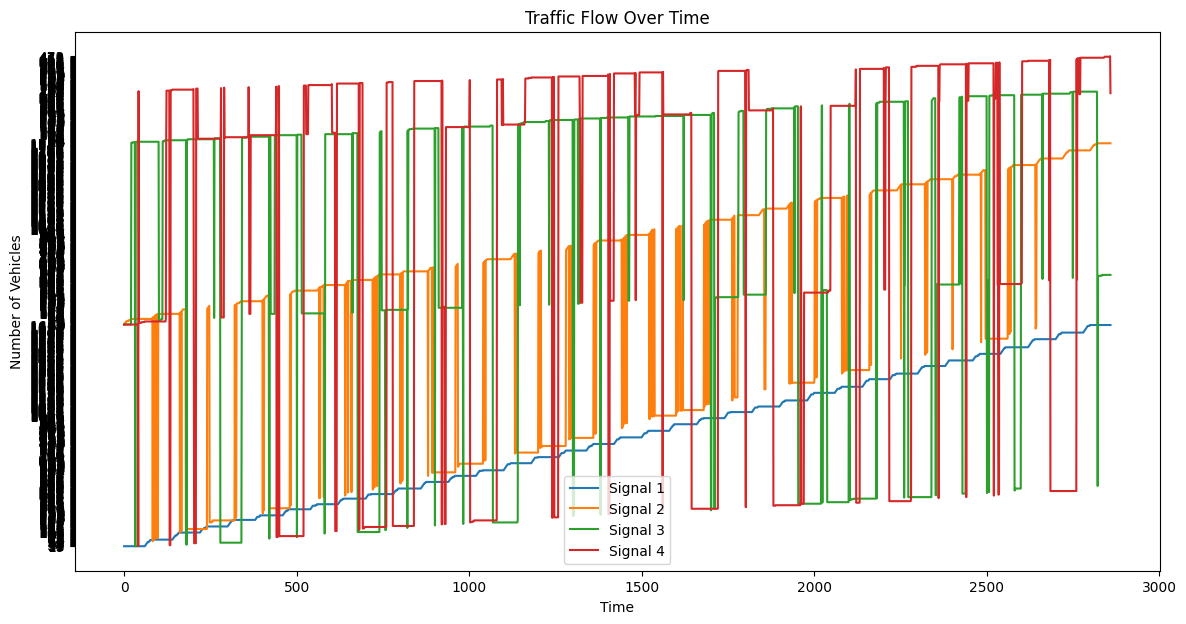

In [38]:
import matplotlib.pyplot as plt

def plot_traffic_flow(data):
    plt.figure(figsize=(14, 7))
    
    for i in range(1, 5):
        plt.plot(data.index, data[f'Vehicles_Crossed_Signal {i}'], label=f'Signal {i}')
    
    plt.title('Traffic Flow Over Time')
    plt.xlabel('Time')
    plt.ylabel('Number of Vehicles')
    plt.legend()
    plt.show()

# Assuming `data` is a pandas DataFrame with a datetime index
plot_traffic_flow(pivoted_df)


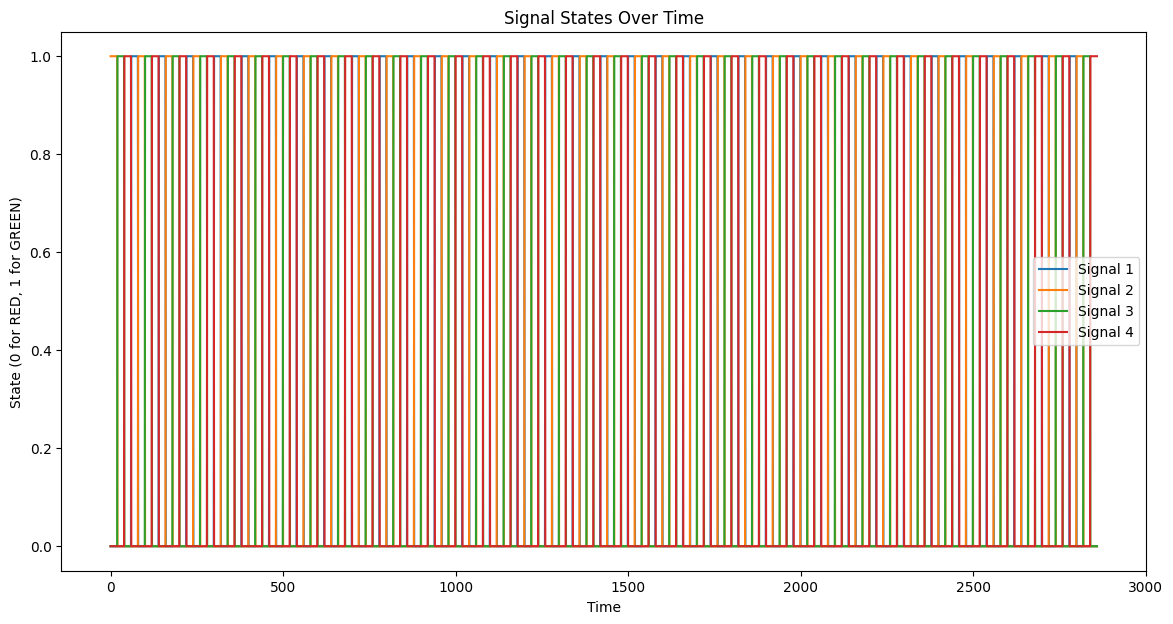

In [39]:
def plot_signal_states(data):
    plt.figure(figsize=(14, 7))
    
    for i in range(1, 5):
        plt.plot(data.index, data[f'State_Signal {i}'], label=f'Signal {i}')
    
    plt.title('Signal States Over Time')
    plt.xlabel('Time')
    plt.ylabel('State (0 for RED, 1 for GREEN)')
    plt.legend()
    plt.show()

# Convert states to numerical values for plotting
state_mapping = {'RED': 0, 'GREEN': 1}
for i in range(1, 5):
    pivoted_df[f'State_Signal {i}'] = pivoted_df[f'State_Signal {i}'].map(state_mapping)

plot_signal_states(pivoted_df)


TypeError: Image data of dtype object cannot be converted to float

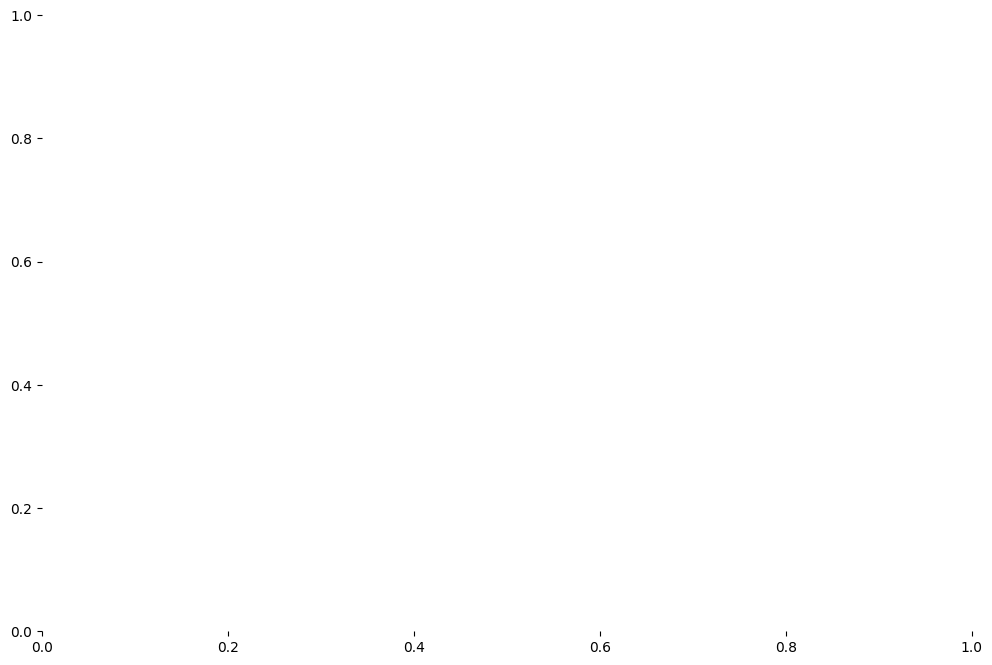

In [40]:
import seaborn as sns

def plot_signal_durations(data):
    signal_durations = data[[f'Red_Signal {i}' for i in range(1, 5)] + [f'Green_Signal {i}' for i in range(1, 5)]]
    plt.figure(figsize=(12, 8))
    sns.heatmap(signal_durations, cmap='viridis', annot=True)
    plt.title('Heatmap of Signal Durations')
    plt.xlabel('Signal')
    plt.ylabel('Time Step')
    plt.show()

plot_signal_durations(pivoted_df)


TypeError: Image data of dtype object cannot be converted to float

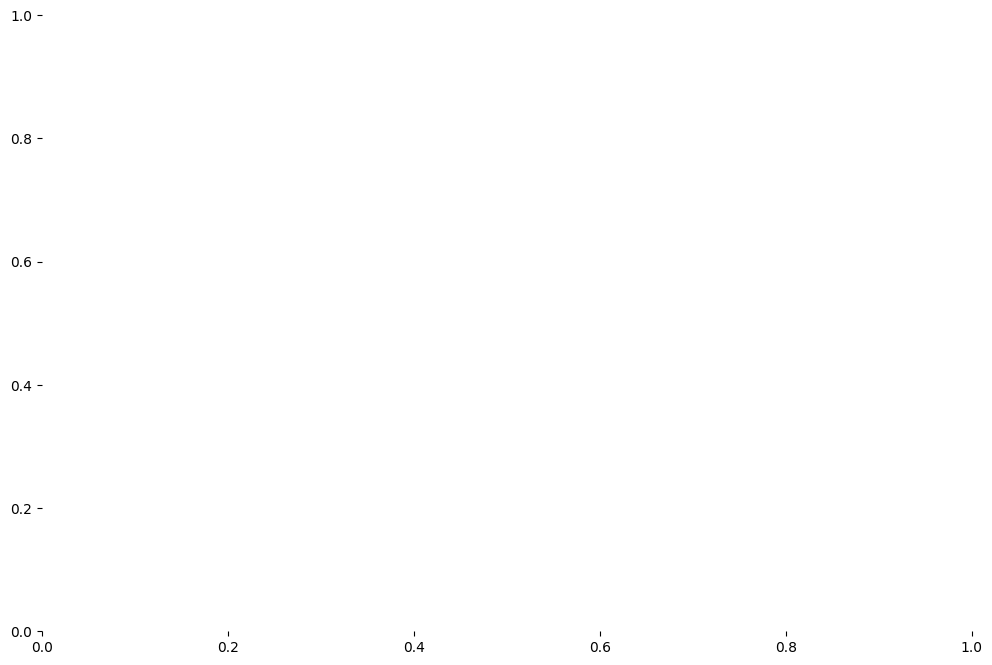

In [41]:
def plot_traffic_density(data):
    traffic_density = data[[f'Vehicles_Crossed_Signal {i}' for i in range(1, 5)]]
    plt.figure(figsize=(12, 8))
    sns.heatmap(traffic_density.T, cmap='coolwarm', annot=True)
    plt.title('Traffic Density Map')
    plt.xlabel('Time Step')
    plt.ylabel('Signal')
    plt.show()

plot_traffic_density(pivoted_df)


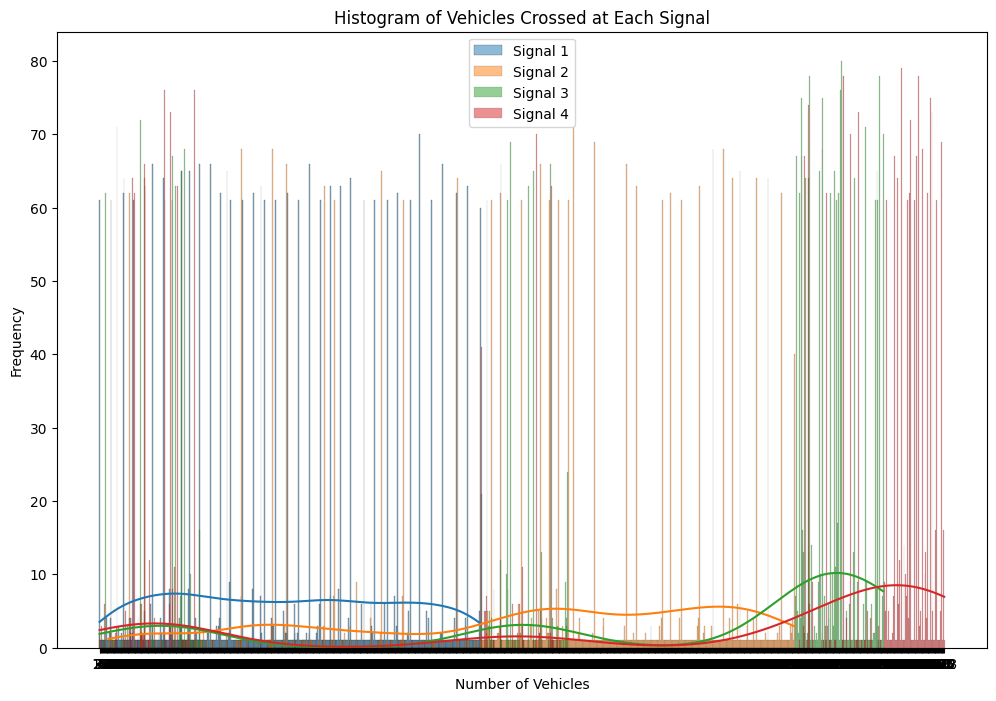

In [42]:
def plot_histogram(data):
    plt.figure(figsize=(12, 8))
    for i in range(1, 5):
        sns.histplot(data[f'Vehicles_Crossed_Signal {i}'], kde=True, label=f'Signal {i}')
    
    plt.title('Histogram of Vehicles Crossed at Each Signal')
    plt.xlabel('Number of Vehicles')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

plot_histogram(pivoted_df)


In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load data
data = pivoted_df

# Encode categorical variables
label_encoder = LabelEncoder()
data['State_Signal 1'] = label_encoder.fit_transform(data['State_Signal 1'])
data['State_Signal 2'] = label_encoder.fit_transform(data['State_Signal 2'])
data['State_Signal 3'] = label_encoder.fit_transform(data['State_Signal 3'])
data['State_Signal 4'] = label_encoder.fit_transform(data['State_Signal 4'])

# Create target variable
print(data.head())
data['next'] = data['Vehicles_Crossed_Signal 1'].shift(-1)
data = data[:-1]  # Remove the last row with NaN target

print(data.head())

# Scale features
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

   State_Signal 1 Red_Signal 1 Green_Signal 1 Vehicles_Crossed_Signal 1  \
0               0          100             20                         7   
1               0           99             20                         7   
2               0           98             20                         7   
3               0           97             20                         7   
4               0           96             20                         7   

   State_Signal 2 Red_Signal 2 Green_Signal 2 Vehicles_Crossed_Signal 2  \
0               1            0             20                         0   
1               1            0             19                         9   
2               1            0             18                        11   
3               1            0             17                        13   
4               1            0             16                        14   

   State_Signal 3 Red_Signal 3 Green_Signal 3 Vehicles_Crossed_Signal 3  \
0               0      

In [ ]:
# Define features and target
X = data_scaled[:, :-1]  # All columns except the last one
y = data_scaled[:, -1]   # The last column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input to be 3D [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=10)

# Evaluate the model
predictions = model.predict(X_test)
error = np.mean((predictions - y_test)**2)
print(f'Mean Squared Error: {error}')

In [ ]:
y_train